# Use Case 2: Comparing Clinical Attributes

## Step 1: Importing packages and setting up your notebook.

This use case will guide you through accessing and manipulating data from the clinical dataframe. We will explore how to retrieve clinical data, select variables for analysis, and represent interactions between those variables in a meaningful way. We will use endometrial cancer data from the CPTAC to will compare FIGO stage--a common measurement of uterine cancer stage (see the [NIH](https://www.cancer.org/cancer/endometrial-cancer/detection-diagnosis-staging/staging.html) for more information)--with BMI to see if there is any correlation.

We will start by importing the standard data analysis libraries, plus the seaborn library for visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Our cancer data and a variety of accessory functions are provided in the cptac package.

In [2]:
import cptac
en = cptac.Ucec()

## Step 2: Getting data

We load the dataframe for clinical results by calling the `en.get_clinical()` method. We can then select the data for the variables we are interested in from the dataframe. To see what clinical attributes are available for analysis, we will print out the column names in the clinical dataframe.

In [3]:
clinical_data = en.get_clinical('mssm')
print(clinical_data.columns)

Index(['tumor_code', 'discovery_study',
       'discovery_study/type_of_analyzed_samples', 'confirmatory_study',
       'confirmatory_study/type_of_analyzed_samples', 'consent/age',
       'consent/sex', 'consent/race', 'consent/ethnicity',
       'consent/ethnicity_race_ancestry_identified',
       ...
       'follow-up/additional_treatment_pharmaceutical_therapy_for_new_tumor',
       'follow-up/additional_treatment_immuno_for_new_tumor',
       'follow-up/number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_loco-regional',
       'follow-up/number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_metastasis',
       'Recurrence-free survival, days',
       'Recurrence-free survival from collection, days',
       'Recurrence status (1, yes; 0, no)', 'Overall survival, days',
       'Overall survival from collection, days',
       'Survival status (1, dead; 0, alive)'],
      dtype=

## Step 3: Organizing the data

For this use case, we are only interested in FIGO stage and BMI.

For the purposes of this example, we want to simplify the FIGO stages to remove the word 'Stage'. 

In [30]:
def simplify_FIGO(row):
    return row['baseline/tumor_stage_pathological'].replace('Stage', '')

# Apply the function to each row
clinical_data['simple_FIGO'] = clinical_data.apply(simplify_FIGO, axis=1)

## Step 4: Plot the data

FIGO stage is categorical and BMI is continuous, so we can use a histogram to see the distribution of the patient's BMI separated by cancer stage.

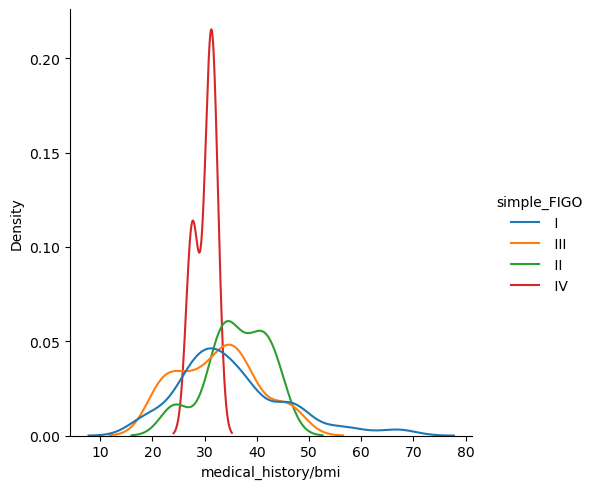

In [31]:
sns.displot(clinical_data, x="medical_history/bmi", hue="simple_FIGO", kind="kde", common_norm=False, bw_adjust=.7)

plt.show()

Another way of viewing this same data is a boxplot. In this example, we add a strip plot over the box plot to visualize each datapoint on top of the boxplot.

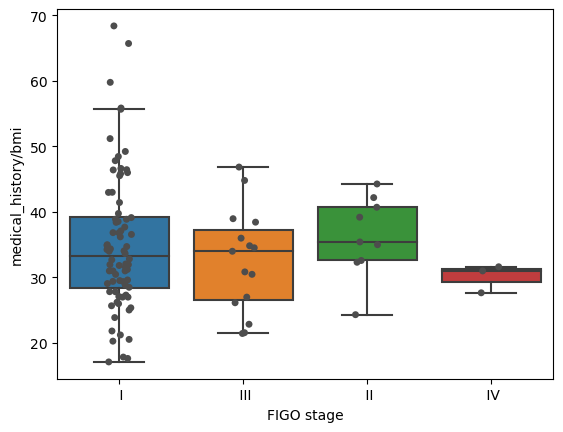

In [32]:
figoStrip = sns.boxplot(data=clinical_data, x="simple_FIGO", y="medical_history/bmi", showfliers=False)
figoStrip = sns.stripplot(data=clinical_data, x="simple_FIGO", y="medical_history/bmi", jitter=True, color=".3")
figoStrip.set(xlabel = "FIGO stage")
plt.show()

## Step 5: Plot other data

The same technique will work for visualizing any other variables in this dataset. As another example, we will create a similar histogram and boxplot to examine the BMI of research subjects compared to their history of cancer. Once again, we select the variables of interest from the clinical dataframe, then plot the resulting dataframe using the seaborn package.

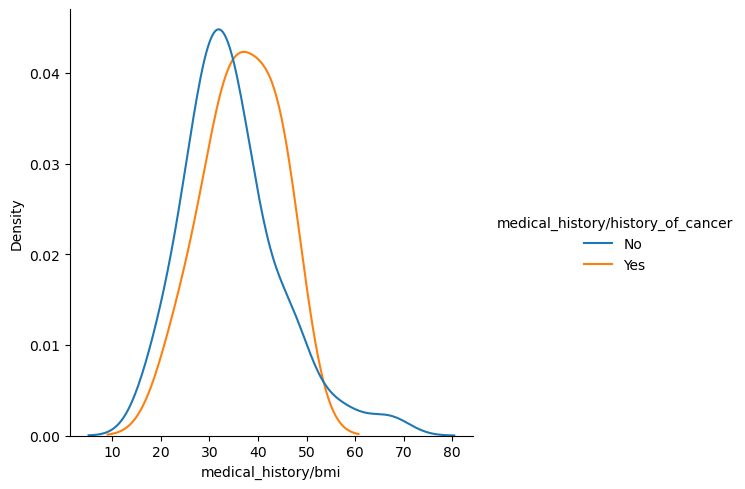

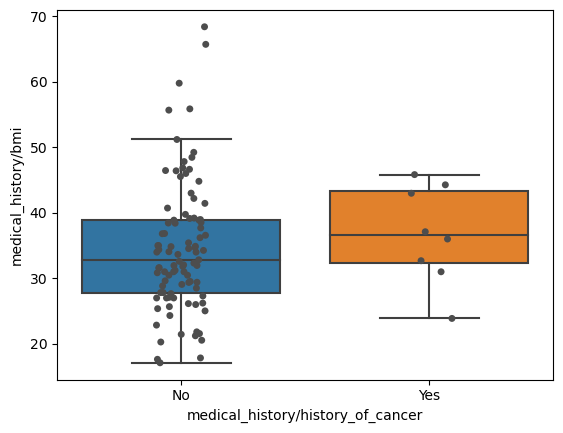

In [37]:
cancer_bmi = clinical_data[['medical_history/history_of_cancer', 'medical_history/bmi']]

#generate histogram
sns.displot(cancer_bmi[cancer_bmi['medical_history/history_of_cancer'] != "Unknown"], x="medical_history/bmi", hue="medical_history/history_of_cancer", kind="kde", common_norm=False)
plt.show()

#generate boxplot 
diabetes_plot = sns.boxplot(data=cancer_bmi, x="medical_history/history_of_cancer", y="medical_history/bmi", showfliers=False)
diabetes_plot = sns.stripplot(data=cancer_bmi, x="medical_history/history_of_cancer", y="medical_history/bmi", jitter=True, color=".3")
plt.show()